# Phyiscs Problems - Lectures 18 & 19 - Homework 9 

FALL 2023


### 1) Altitude of a satellite

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a program that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [1]:
InputValue = float(input("Input Value: "))



h = (((6.67e-11)*(5.97*10**24)*(InputValue)**2) / (4*(3.14)**2))**(1/3) - 6371 * 1000

print(h)

Input Value: 5400
281570.19510489237


Use your program to calculate the altitudes of satellites that orbit the Earth once
a day (so-called “geosynchronous” orbit), once every 90 minutes, and once every
45 minutes. What do you conclude from the last of these calculations?





In [2]:
h1 = (((6.67e-11)*(5.97*10**24)*(5400)**2) / (4*(3.14)**2))**(1/3) - 6371 * 1000
h2 = (((6.67e-11)*(5.97*10**24)*(2700)**2) / (4*(3.14)**2))**(1/3) - 6371 * 1000

print(h1)
print(h2)

281570.19510489237
-2180143.387642051


Technically a geosynchronous satellite is one that orbits the Earth once persidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

In [3]:
h3 = (((6.67e-11)*(5.97*10**24)*(86148)**2) / (4*(3.14)**2))**(1/3) - 6371 * 1000

print(h3)

35788012.08235531


#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive heeghts with times less than geosynchronous in blue and those longer in green.

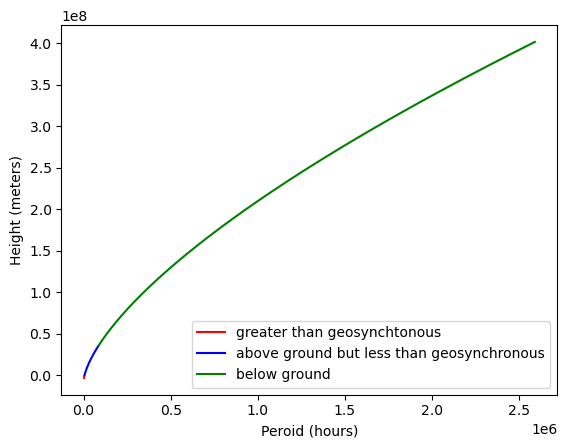

In [4]:
import matplotlib.pyplot as plt

def calc_altitude(t):
    h = (((6.67e-11)*(5.97e24)*(t)**2) / (4*(3.14)**2))**(1/3) - 6371 * 1000
    return h
#fig,ax=plt.subplots()
#ax.plot([1,2,3,4],[1,4,2,3])
#ax.plot([4,5,6,7],[calc_altitude(400),calc_altitude(500),calc_altitude(600),calc_altitude(700)])
times = []
altitude = []

for t in range(1800, 2592000, 1800):  
    h = calc_altitude(t)
    times.append(t)
    altitude.append(h)

red_times = []
red_altitude = []
blue_times = []
blue_altitude = []
green_times = []
green_altitude = []

for t, h in zip(times, altitude):
    if h < 0:
        red_times.append(t)
        red_altitude.append(h)
    elif t < 86148:
        blue_times.append(t)
        blue_altitude.append(h)
    else:
        green_times.append(t)
        green_altitude.append(h)

fig, ax = plt.subplots()

ax.plot(red_times, red_altitude, 'r', label='greater than geosynchtonous', markersize=3)
ax.plot(blue_times, blue_altitude, 'b', label='above ground but less than geosynchronous', markersize=3)
ax.plot(green_times, green_altitude, 'g', label='below ground', markersize=3)

ax.set_xlabel('Peroid (hours)')
ax.set_ylabel('Height (meters)')

ax.legend()

#plt.show()


### 2) Special Relativity

A spaceship travels from Earth in a straight line at a (relativistic)
speed $v$ to another planet $x$ light years away. Write a program to ask
the user for the value of $x$ and the speed $v$ as a fraction of the speed
of light, then print out the time in years that the spaceship takes to
reach its destination (a) in the rest frame of an observer on Earth
and (b) as perceived by a passenger on board the ship.

$$x' = \gamma (x - vt)$$

$$t' = \gamma \left(t - \frac{v x}{c^2}\right)$$

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$


In [5]:
#Numpy Import Math 
#c = 299792458
#x = float(input("Enter Distance to the planet X: "))
#v = float(input("Input Value Speed V as a Fraction of the Speed of Light: "))

#gamma = 1 / math.sqrt(1-(v**2))
#t_ship = x / (c * v)
#t_earth = x /(c * v) / gamma





#### Use your program to calculate the answers for a planet 10 light years away with $v = 0.90c$,  $v = 0.98c$, $v = 0.999c$.

In [6]:
import numpy as np

c = 299792458 

def calculate_shipyears(distance_ly, speed_fraction_c):
    
    gamma = 1 / np.sqrt(1 - speed_fraction_c**2)
    t_earth = distance_ly * c / (speed_fraction_c * c)
    t_ship = t_earth / gamma
    t_ship_years = t_ship 
    return t_ship_years

#speeds = np.array([0.9, 0.98, 0.999])  
#distances_ly = np.array([10, 10, 10])  
speeds = [0.9, 0.98, 0.999]
distances_ly = [10, 10, 10] 

for speed_fraction_c, distance_ly in zip(speeds, distances_ly):
    t_ship_years = calculate_shipyears(distance_ly, speed_fraction_c)
    t_earth_years = t_ship_years / (np.sqrt(1 - speed_fraction_c**2))
   
    print(f"What is the velocity as a fraction of the speed of light? {speed_fraction_c:.2f}")
    print(f"How far are you traveling in light years? {distance_ly}")
    print(f"Observing from Earth it took {t_earth_years:.2f} years.")
    print(f"Passengers on board the ship perceived to take {t_ship_years:.2f} years.")
    print()


What is the velocity as a fraction of the speed of light? 0.90
How far are you traveling in light years? 10
Observing from Earth it took 11.11 years.
Passengers on board the ship perceived to take 4.84 years.

What is the velocity as a fraction of the speed of light? 0.98
How far are you traveling in light years? 10
Observing from Earth it took 10.20 years.
Passengers on board the ship perceived to take 2.03 years.

What is the velocity as a fraction of the speed of light? 1.00
How far are you traveling in light years? 10
Observing from Earth it took 10.01 years.
Passengers on board the ship perceived to take 0.45 years.



### 3) The quadratic equation

 Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard
formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [7]:
import math
def quadratic_raw (a,b,c,d):
    return (-b +d* math.sqrt (b**2 - 4*a*c)) / (2*a)
def quadratic_plus (a,b,c):
    return quadratic_raw (a,b,c,1)
def quadratic_minus (a,b,c):
    return quadratic_raw (a,b,c,-1)

x1 = quadratic_plus (0.001,1000,0.001)
x2 = quadratic_minus (0.001,1000,0.001)

print(x1)
print(x2)

-9.999894245993346e-07
-999999.999999


There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b \mp \sqrt{b^2 - 4ac}$, show that the solutions
can also be written as:

$$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$

Add further lines to your program to print these values in addition to the earlier ones and again use the program to solve $0.001x^2 + 1000x + 0.001 = 0$. What do you see? How do you explain it?

In [8]:
import math 
def quadratic_plus_alt(a,b,c):
    return 1/quadratic_plus(c,b,a)
def quadratic_minus_alt(a,b,c):
    return 1/quadratic_minus(c,b,a)

x1 = quadratic_plus_alt (0.001,1000,0.001)
x2 = quadratic_minus_alt (0.001,1000,0.001)

print(x1)
print(x2)

-1000010.5755125057
-1.000000000001e-06


Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases.

### 4) Planetary orbits

The orbit in space of one body around another, such as a planet around the Sun, need not be circular. In general it takes the form of an ellipse, with the body sometimes closer in and sometimes further out. If you are given the distance $l_1$ of closest approach that a planet makes to the Sun, also called its perihelion, and its linear velocity $v_1$ at *perihelion*, then any other property of the orbit can be calculated from these two as follows.

Kepler’s second law tells us that the distance $l_2$ and velocity $v_2$ of the planet at its most distant point, or *aphelion*, satisfy $l_2 v_2 = l_1 v_1$. 


Given the values of $v_1$, $l_1$, and $l_2$, other parameters of the orbit are given by simple formulas can that be derived from Kepler’s laws and the fact that the orbit is an ellipse:

Semi-Major Axis $$ a = \frac{1}{2} (l_1 + l_2) $$ 
Semi-Minor Axis: $$ b = \sqrt{l_1  l_2} $$ 
Orbital Period: $$ T = \frac{2 \pi a b}{l_1 v_1} $$ 
Orbital eccentricity:  $$ e = \frac{l_2 - l_1}{l_2 + l_1}$$

#### Write a program with functions that asks the user to enter the distance to the Sun and velocity at perihelion, then calculates and prints the quantities $l2$, $v2$, $a$, $b$, $T$, and $e$.




In [20]:
import math

l1 = float(input("Enter the perihelion in meters: "))
v1 = float(input("Enter the velocity at perihelion in m/s: "))

g = 1.989 * (10**30)
m = 6.67428 * (10**-11)

A = 1
B = -(2 * g * m) / (v1 * l1)
C = -(v1**2 - (2 * g * m / l1))

v2 = (-B - math.sqrt(B**2 - 4 * A * C)) / (2 * A)

l2 = (l1 * v1) / v2

a = 0.5 * (l1 + l2)
b = math.sqrt(l1 * l2)

T = (2 * math.pi * a * b) / (l1 * v1)
e = (l2 - l1) / (l2 + l1)

print("l2 =", l2, "meters")
print("v2 =", v2, "m/s")
print("a =", a, "meters")
print("b =", b, "meters")
print("T =", T / (3600 * 24 * 365.25), "years")
print("e =", e)


   



Enter the perihelion in meters: 1.471e11
Enter the velocity at perihelion in m/s: 3.0287e4
l2 = 152020505890.42932 meters
v2 = 29306.689080558343 m/s
a = 149560252945.21466 meters
b = 149540016104.32626 meters
T = 0.9994949060345524 years
e = 0.016449911636053964


###### Test your program by having it calculate the properties of the orbits of the Earth (for which $l_1 = 1.4710 \times 10^{11}$ m and $v_1 = 3.0287 \times 10^4$ m s$^{−1}$ ) and Halley’s comet ($l_1 = 8.7830 \times 10^{10}$ m and $v_1 = 5.4529 \times 10^4$ m s${−1}$ ). Among other things, you should find that the orbital period of the Earth is one year and that of Halley’s comet is about 76 years.

In [18]:
import math

l1 = float(input("Enter the perihelion in meters: "))
v1 = float(input("Enter the velocity at perihelion in m/s: "))

g = 1.989 * (10**30)
m = 6.67428 * (10**-11)

A = 1
B = -(2 * g * m) / (v1 * l1)
C = -(v1**2 - (2 * g * m / l1))

v2 = (-B - math.sqrt(B**2 - 4 * A * C)) / (2 * A)

l2 = (l1 * v1) / v2

a = 0.5 * (l1 + l2)
b = math.sqrt(l1 * l2)

T = (2 * math.pi * a * b) / (l1 * v1)
e = (l2 - l1) / (l2 + l1)

print("l2 =", l2, "meters")
print("v2 =", v2, "m/s")
print("a =", a, "meters")
print("b =", b, "meters")
print("T =", T / (3600 * 24 * 365.25), "years")
print("e =", e)


Enter the perihelion in meters: 8.7830e10
Enter the velocity at perihelion in m/s: 5.4529e4
l2 = 5275233253753.388 meters
v2 = 907.8806262438484 m/s
a = 2681531626876.694 meters
b = 680678879264.7822 meters
T = 75.8805873550585 years
e = 0.9672463307463206
